In [12]:
import os
from os.path import isfile, isdir, join
import logging

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily
import itertools

import crime_patterns.utilities as utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
logger = logging.getLogger(__name__)
# logger.setLevel(logging.INFO)

In [3]:
data_dir = r"..\crime_patterns\data"
shapefiles_dir = os.path.join(data_dir, "statistical-gis-boundaries-london", "ESRI")
london_ward_shp_path = os.path.join(shapefiles_dir, "London_Ward.shp")
london_borough_shp_path = os.path.join(shapefiles_dir, "London_Borough_Excluding_MHW.shp")
london_LSOA_shp_path = os.path.join(shapefiles_dir, "London_Borough_Excluding_MHW.shp")


crime_incidence_path = os.path.join(data_dir, r"uk_crime_data_all\2021-01\2021-01-city-of-london-street.csv")
cleaned_data_dir = r"C:\Users\Mumu\Desktop\Bonn Econ\Winter22-23\EPP\crime_patterns\bld\python\data"

In [13]:
utils.download_file(
    url="https://opendatacommunities.org/downloads/cube-table?uri=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices", 
    dest_folder= "test",
    filename="imd2019_lsoa_uk.csv") #r"C:\Users\Mumu\Desktop\Bonn Econ\Winter22-23\EPP\crime_patterns\src\notebooks")

'test\\imd2019_lsoa_uk.csv'

In [15]:
utils.download_file(
    url="https://www.arcgis.com/sharing/rest/content/items/5e1c399d787e48c0902e5fe4fc1ccfe3/data",
    dest_folder= "test",
    filename="imd_shape.zip"
)

'test\\imd_shape.zip'

In [16]:
from zipfile import ZipFile

In [5]:
london_LSOA = 
london_ward = gpd.read_file(london_ward_shp_path)
london_borough = gpd.read_file(london_borough_shp_path)

In [6]:
london_ward.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [7]:
london_borough.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

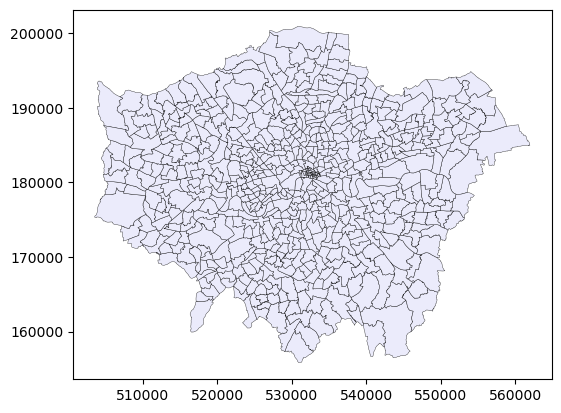

In [36]:
axes = london_ward.plot(color="lavender", edgecolor="black", linewidth= 0.3, alpha=0.8)

# contextily.add_basemap(
#     axes,
#     crs=london_ward.crs,
#     source=contextily.providers.CartoDB.PositronNoLabels,
# )

In [39]:
london_ward.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [24]:
# london_ward_4326 = london_ward.to_crs(4326)
crime_data_gdf_BritishGrid = crime_data_gdf.to_crs(london_ward.crs)

<Axes: >

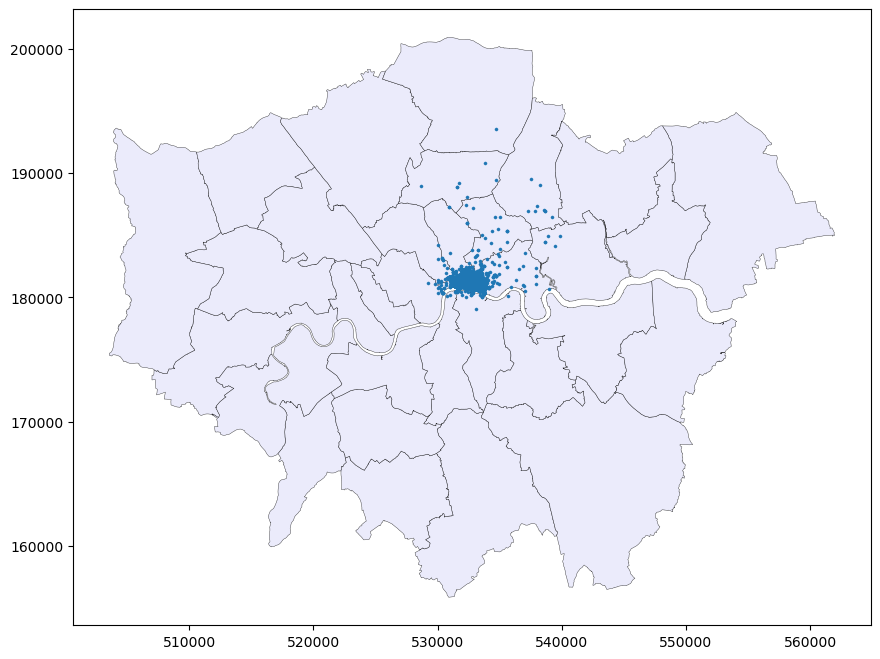

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

london_borough.plot(ax=ax, color="lavender", edgecolor="black", linewidth= 0.3, alpha=0.8)

crime_data_gdf_BritishGrid.plot(ax=ax, 
                    # color="red",
                    # cmap="Spectral",
                    # column='Crime type',
                    # colorbar=True,
                    markersize=5, 
                    # edgecolor="k", 
                    legend=True,
                    legend_kwds={'bbox_to_anchor': (0.5, 0.8)},
                    linewidth=0.3,
                    aspect=1
                    )

# ax.set_xlim(-0.150, -0.02)
# ax.set_ylim(51.49, 51.56)
# ax.legend()

In [39]:
crime_incidence_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
crime_incidence_gdf['Crime type'].unique()

array(['Anti-social behaviour', 'Other theft', 'Shoplifting',
       'Theft from the person', 'Criminal damage and arson', 'Drugs',
       'Public order', 'Violence and sexual offences', 'Bicycle theft',
       'Burglary', 'Vehicle crime', 'Robbery', 'Other crime',
       'Possession of weapons'], dtype=object)

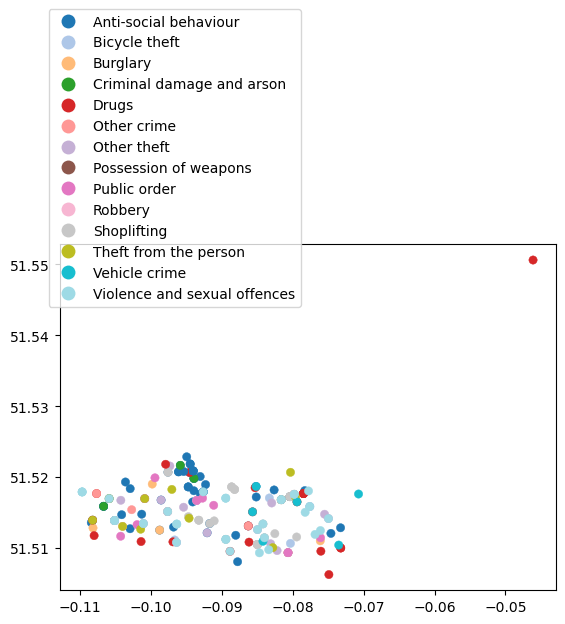

In [82]:
ax = crime_incidence_gdf.plot(# ax=ax, 
                        # color="red",
                        cmap="tab20",
                        column='Crime type',
                        # colorbar=True,
                        # markersize=2, 
                        # edgecolor="k", 
                        legend=True,
                        legend_kwds={'bbox_to_anchor': (0.5, 0.8)},
                        linewidth=0.3,
                        aspect=1
                        )
                        
